IPL DATA ANALYSIS

IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LOAD DATASET

In [7]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("delivering.csv")
matches.head()
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


TOTAL MATCHES PER SEASON


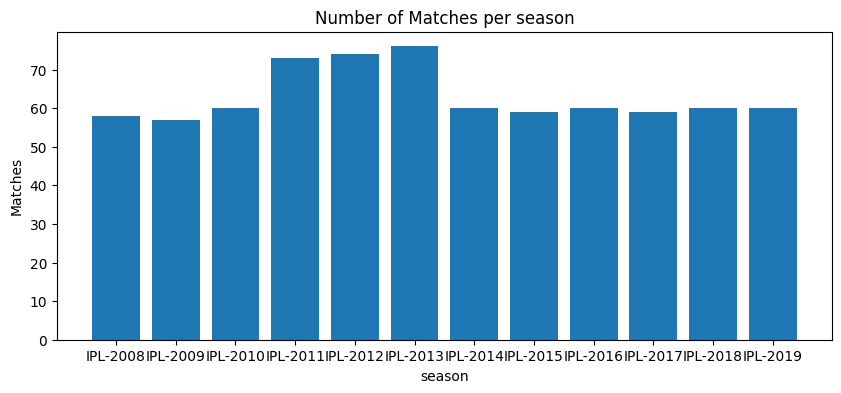

In [8]:
season_count = matches["Season"].value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.bar(season_count.index,season_count.values)
plt.title("Number of Matches per season")
plt.xlabel("season")
plt.ylabel("Matches")
plt.show()


MOST SUCCESSFUL TEAM (BASED ON WINS)

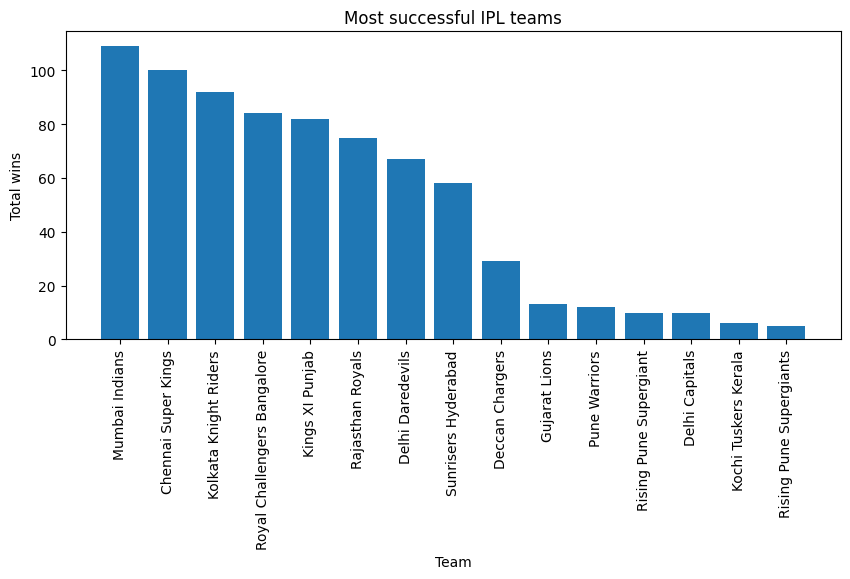

In [9]:
win = matches['winner'].value_counts()
plt.figure(figsize=(10,4))
plt.bar(win.index,win.values)
plt.xticks(rotation=90)
plt.title("Most successful IPL teams")
plt.xlabel("Team")
plt.ylabel("Total wins")
plt.show()


TOP BATSMEN (TOP RUNS)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

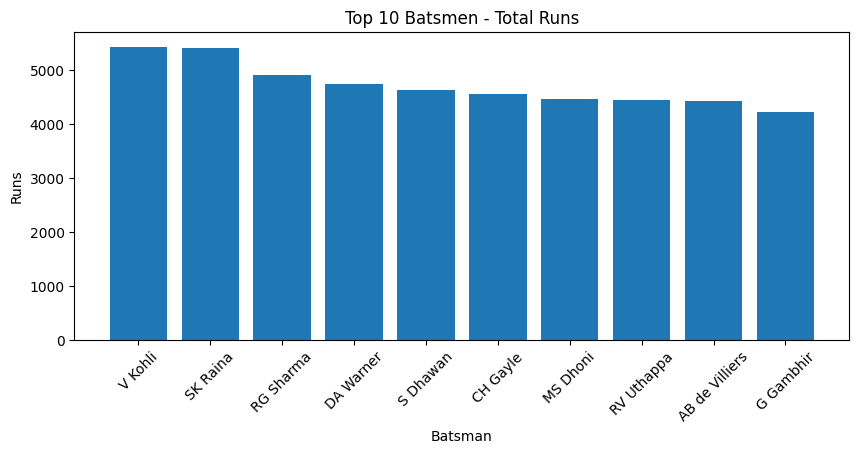

In [10]:
top_batsman = deliveries.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).head(10)
display(top_batsman)
plt.figure(figsize=(10,4))
plt.bar(top_batsman.index,top_batsman.values)
plt.xticks(rotation=45)
plt.title("Top 10 Batsmen - Total Runs")
plt.xlabel("Batsman")
plt.ylabel("Runs")
plt.show()


TOP BOWLERS(WICKET TAKER)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179019,11415,2,Chennai Super Kings,Mumbai Indians,11,3,AT Rayudu,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,AT Rayudu,caught,Q de Kock
179033,11415,2,Chennai Super Kings,Mumbai Indians,13,5,SR Watson,MS Dhoni,HH Pandya,0,...,0,0,0,0,1,0,1,MS Dhoni,run out,Ishan Kishan
179067,11415,2,Chennai Super Kings,Mumbai Indians,19,2,DJ Bravo,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,DJ Bravo,caught,Q de Kock
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya


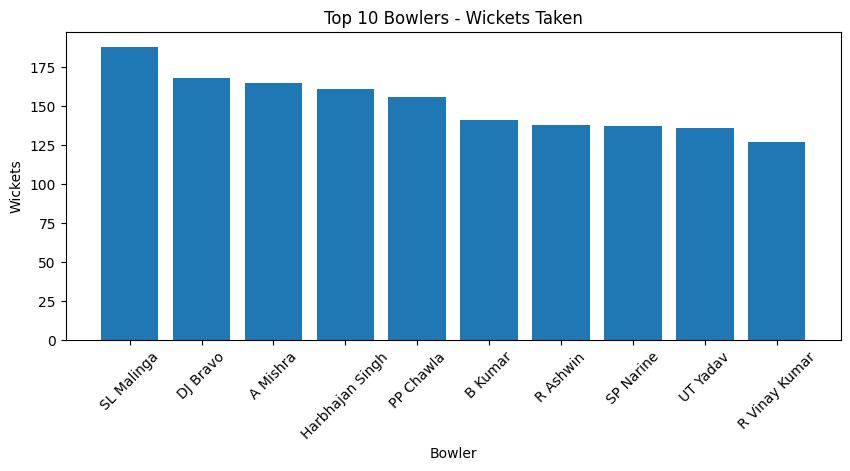

In [11]:
dismissal = deliveries[deliveries["dismissal_kind"].notnull()]
display(dismissal)
top_bowlers = dismissal.groupby('bowler')["dismissal_kind"].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,4))
plt.bar(top_bowlers.index,top_bowlers.values)
plt.xticks(rotation=45)
plt.title("Top 10 Bowlers - Wickets Taken")
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.show()

MOST SIXES BY A PLAYER

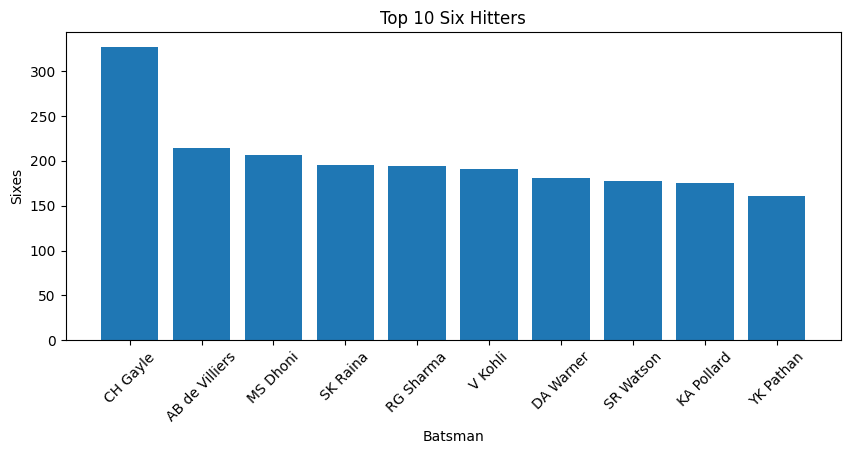

In [12]:
sixes = deliveries[deliveries['batsman_runs']==6]
top_sixes = sixes.groupby("batsman")["batsman_runs"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,4))
plt.bar(top_sixes.index,top_sixes.values)
plt.xticks(rotation=45)
plt.title("Top 10 Six Hitters")
plt.xlabel("Batsman")
plt.ylabel("Sixes")
plt.show()

TOSS WINNER VS MATCH WINNER

In [13]:
toss_matches = matches[matches['toss_winner'] == matches['winner']]
percent = len(toss_matches)/len(matches)*100
print("Percentage of matches where Toss Winner also Won the Match:", percent)

Percentage of matches where Toss Winner also Won the Match: 51.98412698412699


TEAM PERFORMANCE IN EACH SEASON

In [14]:
team_season = matches.groupby(['Season','winner']).size().unstack().fillna(0)
display(team_season)


winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
Season,,,,,,,,,,,,,,,
IPL-2008,9.0,2.0,0.0,7.0,0.0,10.0,0.0,6.0,7.0,0.0,13.0,0.0,0.0,4.0,0.0
IPL-2009,8.0,9.0,0.0,10.0,0.0,7.0,0.0,3.0,5.0,0.0,6.0,0.0,0.0,9.0,0.0
IPL-2010,9.0,8.0,0.0,7.0,0.0,4.0,0.0,7.0,11.0,0.0,6.0,0.0,0.0,8.0,0.0
IPL-2011,11.0,6.0,0.0,4.0,0.0,7.0,6.0,8.0,10.0,4.0,6.0,0.0,0.0,10.0,0.0
IPL-2012,10.0,4.0,0.0,11.0,0.0,8.0,0.0,12.0,10.0,4.0,7.0,0.0,0.0,8.0,0.0
IPL-2013,12.0,0.0,0.0,3.0,0.0,8.0,0.0,6.0,13.0,4.0,11.0,0.0,0.0,9.0,10.0
IPL-2014,10.0,0.0,0.0,2.0,0.0,12.0,0.0,11.0,7.0,0.0,7.0,0.0,0.0,5.0,6.0
IPL-2015,10.0,0.0,0.0,5.0,0.0,3.0,0.0,7.0,10.0,0.0,7.0,0.0,0.0,8.0,7.0
IPL-2016,0.0,0.0,0.0,7.0,9.0,4.0,0.0,8.0,7.0,0.0,0.0,0.0,5.0,9.0,11.0


EXPORT ANALYSIS RESULT

In [15]:
team_season.to_csv("ipl_team_season_summary.csv")